# A: The Wavelet Transform

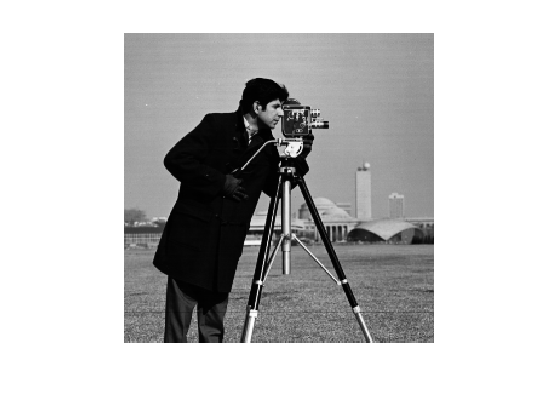

In [56]:
I = imread('cameraman.tif');
imshow(I, [])

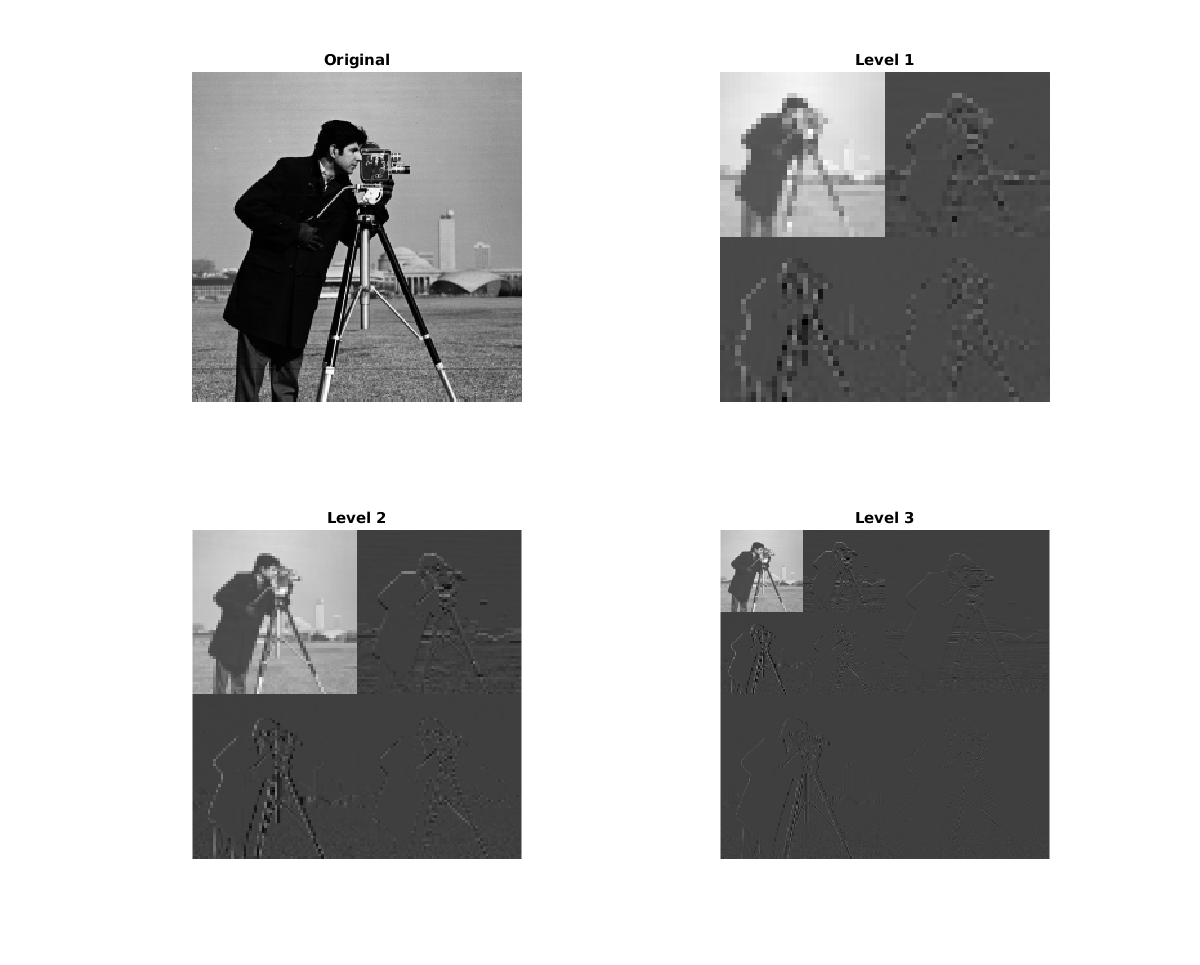

In [17]:
[LL1, LH1, HL1, HH1] = dwt2(I, 'haar');
[LL2, LH2, HL2, HH2] = dwt2(LL1, 'haar');
[LL3, LH3, HL3, HH3] = dwt2(LL2, 'haar');

A1 = [LL3, LH3; HL3, HH3];
A2 = [LL2, LH2; HL2, HH2];
A3 = [A2, LH1; HL1, HH1];


figure (1)
hFig = figure(1);
set(gcf,'PaperPositionMode','auto')
set(hFig, 'Position', [0 0 1200 1600])

subplot(2,2,1);
imshow(I, []);
title('Original');

subplot(2,2,2);
imshow(A1, []);
title('Level 1');

subplot(2,2,3)
imshow(A2, []);   
title('Level 2')

subplot(2,2,4);
imshow(A3, []);
title('Level 3');

Here we see the results of taking several levels of the Haar discrete wavelet transform. Each level is obtained from the previous one by performing a DWT on the upper-left block of the image, corresponding to the approximation coefficients. Continuining recursively in this way for the desired amount of levels and nesting/stacking the resulting images yields the familiar pyramid-style composite images seen in levels 2 and 3.

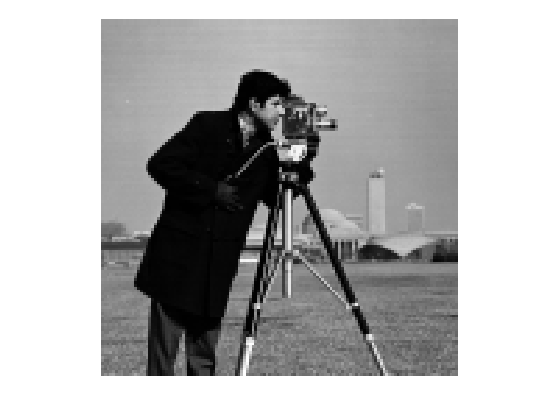

In [47]:
oneFromTwo = idwt2(LL2, LH2, HL2, HH2, 'haar');
imshow(oneFromTwo, [], 'InitialMagnification', 400);
imwrite(oneFromTwo, 'cameraman_A1.png');

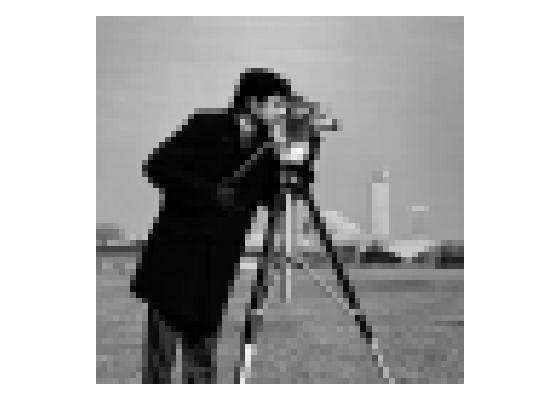

In [49]:
twoFromThree = idwt2(LL3, LH3, HL3, HH3, 'haar');
imshow(twoFromThree, [], 'InitialMagnification', 1000);
imwrite(twoFromThree, 'cameraman_A2.png');

## Results

In the first case, the reconstruction is accurate but shows some minor signs of degradation. In the second case 

# B: Wavelet-based Edge Detection

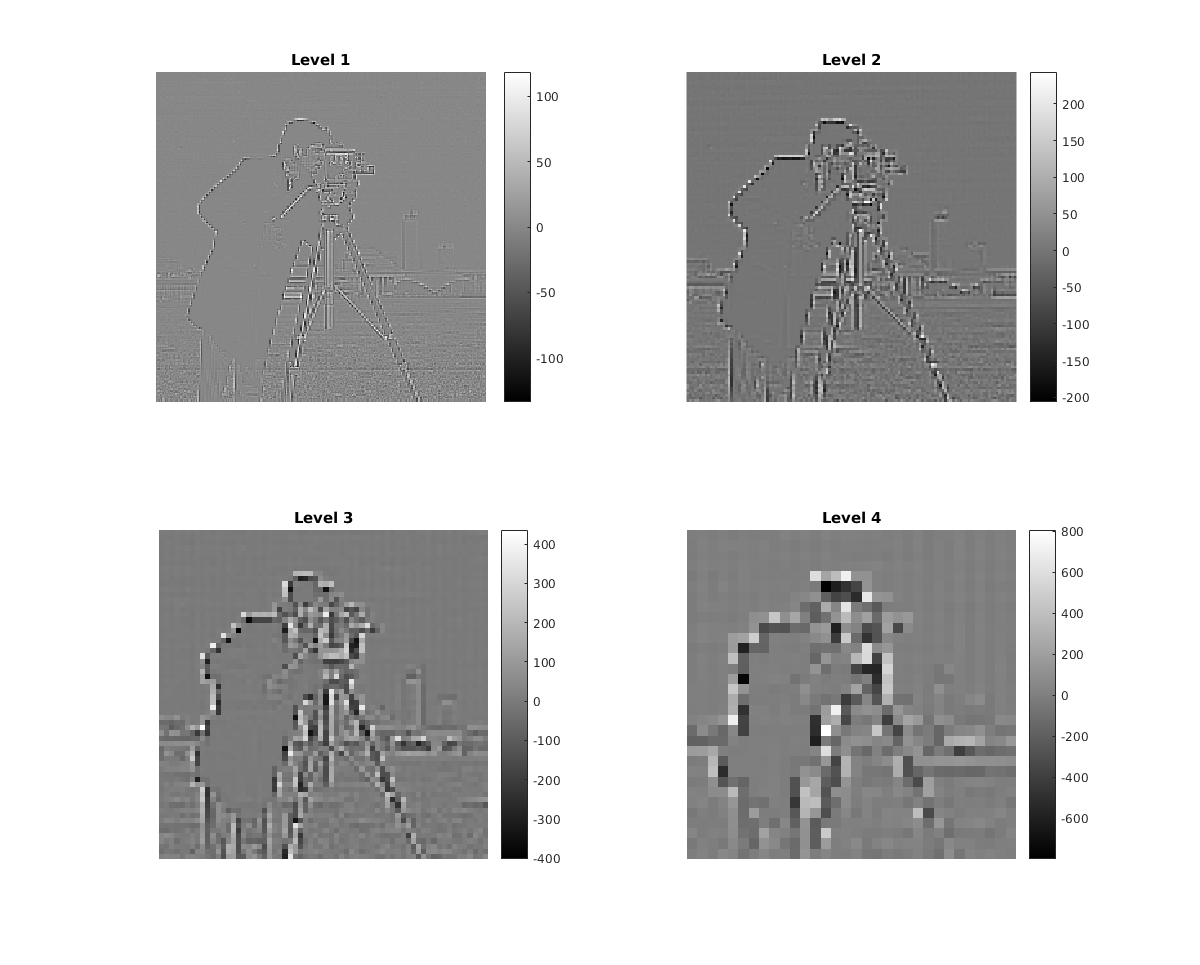

In [51]:
LL = {};
LH = {};
HL = {};
HH = {};

A = {};
A{1} = I;

LL{1} = I;

for i = 2:5
    [LL{i}, LH{i}, HL{i}, HH{i}] = dwt2(LL{i-1}, 'haar');
end

figure (1)
hFig = figure(1);
set(gcf,'PaperPositionMode','auto')
set(hFig, 'Position', [0 0 1200 1600])

for i = 2:5
    A{i} = idwt2(zeros(size(LL{i})), LH{i}, HL{i}, HH{i}, 'haar');
    subplot(2,2,i-1);
    imshow(A{i}, [])
    title(sprintf('Level %d', i-1))
    colorbar
end
%print('2b','-dpng')

## Results
Here we see that this process does an excellent job of detecting edges at many levels of detail and granularity. The level 1 image result is similar to other edge detection filters we've seen, although it still retains some extraneous details such as many of the lines in the background building/structure.

The level 2 approximation provides much coarser edges, so some of the ability to distinguish different the boundaries between different features, but provides much more contrast. As the levels increase, the lines become more blob-like and only serve to indicate the general locations of interesting objects within the image, rather than their precise edges.

# C: Wavelet-based Noise Removal

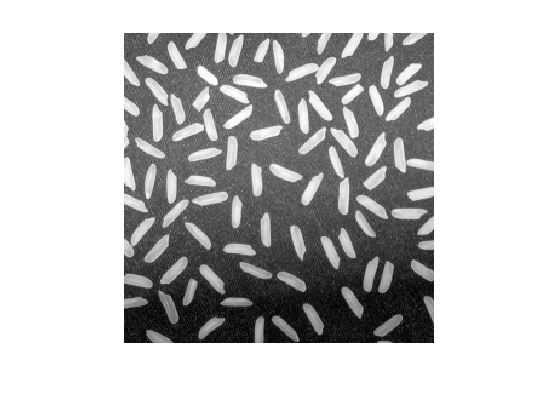

In [58]:
I = imread('rice.png');
imshow(I, [])

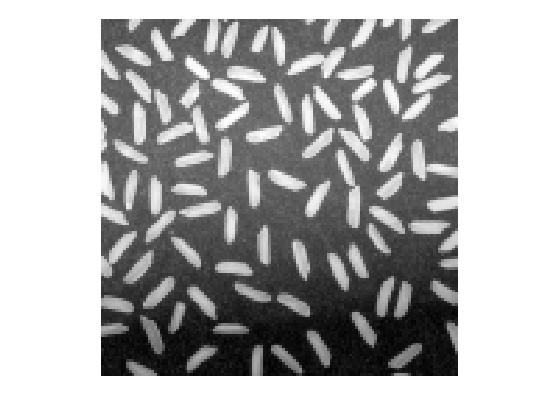

In [66]:
[LL1, LH1, HL1, HH1] = dwt2(I, 'haar');
[LL2, LH2, HL2, HH2] = dwt2(LL1, 'haar');

A1 = [LL2, LH2; HL2, HH2];
A2 = [A1, LH1; HL1, HH1];

z1 = zeros(size(LL2));
z = zeros(size(LL1));

Ip1 = idwt2(LL2, LH2, HL2, HH2, 'haar');
Ip2 = idwt2(Ip1, z, z, z, 'haar');

imshow(Ip2, [], 'InitialMagnification', 200);
imwrite(Ip2, 'rice_nr.png');

## Results

We find that the result is a slightly blurred version of the input image. In particular, the noisy portion of the background is blended together in a way that resembles the effects of a Gaussian filter, and the contrasting elements stand out slightly more.